In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from turbofan_importFDdata import turbofan_importFDdata

In [2]:
data = turbofan_importFDdata('./train_FD002.txt')

X = data.values[:, 5:]
m = X.shape[0]
n = X.shape[1]
Xnames = list(data.columns[5:])
data
# modi = np.round((data.loc[:,'Setting1'] + data.loc[:,'Setting2'] + data.loc[:,'Setting3']) /3)
# print(f'Unique modes: {modi.unique()}')

,Unit,Time,Setting1,Setting2,Setting3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPres,...,FuelFlowRatio,CorrFanSpeed,CorrCoreSpeed,BypassRatio,BurnerFuelAirRatio,BleedEnthalpy,DemandFanSpeed,DemandCorrFanSpeed,HPTCoolantBleed,LPTCoolantBleed
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


In [3]:
for i in range(1,261):
    data.loc[data.Unit == i] = data.loc[data.Unit == i].assign(Time=data.loc[data.Unit == i].loc[:,"Time"].max()-data.loc[data.Unit == i].loc[:,"Time"])
modi = np.round((data.loc[:,'Setting1'] + data.loc[:,'Setting2'] + data.loc[:,'Setting3']) /3)
print(f'Unique modes: {modi.unique()}')
data.drop('Setting1', inplace=True, axis=1)
data.drop('Setting2', inplace=True, axis=1)
data.drop('Setting3', inplace=True, axis=1)
data.insert(2, 'Modi', modi)
data.loc[data.Modi == 29, 'Modi'] = 1
data.loc[data.Modi == 33, 'Modi'] = 2
data.loc[data.Modi == 37, 'Modi'] = 3
data.loc[data.Modi == 40, 'Modi'] = 4
data.loc[data.Modi == 45, 'Modi'] = 5
data.loc[data.Modi == 48, 'Modi'] = 6
data

Unique modes: [45. 48. 29. 40. 33. 37.]


,Unit,Time,Modi,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPres,BypassDuctPres,TotalHPCOutletPres,...,FuelFlowRatio,CorrFanSpeed,CorrCoreSpeed,BypassRatio,BurnerFuelAirRatio,BleedEnthalpy,DemandFanSpeed,DemandCorrFanSpeed,HPTCoolantBleed,LPTCoolantBleed
0,1,148,5.0,449.44,555.32,1358.61,1137.23,5.48,8.00,194.64,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,147,6.0,445.00,549.90,1353.22,1125.78,3.91,5.71,138.51,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,146,1.0,462.54,537.31,1256.76,1047.45,7.05,9.02,175.71,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,145,6.0,445.00,549.51,1354.03,1126.38,3.91,5.71,138.46,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,144,1.0,462.54,537.07,1257.71,1047.93,7.05,9.03,175.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,4,4.0,491.19,608.79,1495.60,1269.51,9.35,13.66,334.00,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
53755,260,3,3.0,489.05,605.81,1514.32,1324.12,10.52,15.50,392.46,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
53756,260,2,1.0,462.54,537.48,1276.24,1057.92,7.05,9.04,175.11,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
53757,260,1,1.0,462.54,537.84,1272.95,1066.30,7.05,9.04,174.81,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


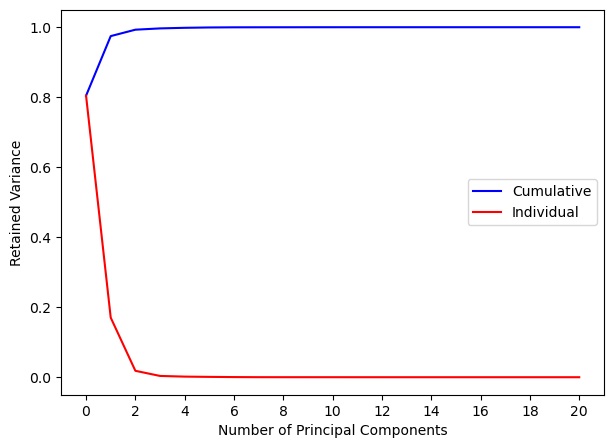

In [4]:
# PCA
Z = StandardScaler().fit_transform(data.values[:, 3:])
pca = PCA().fit(Z)
coeff = (pca.components_).T
score = pca.transform(Z)
variance_ratio = pca.explained_variance_ratio_

fig = plt.figure(figsize=(7, 5))

# >>> enter your code here
plt.plot(range(n), variance_ratio.cumsum(), 'b-')
plt.plot(range(n), variance_ratio, 'r-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Retained Variance')
plt.xticks(range(0, 21, 2))
plt.legend(['Cumulative', 'Individual']);

AttributeError: 'Axes3D' object has no attribute 'xlabel'

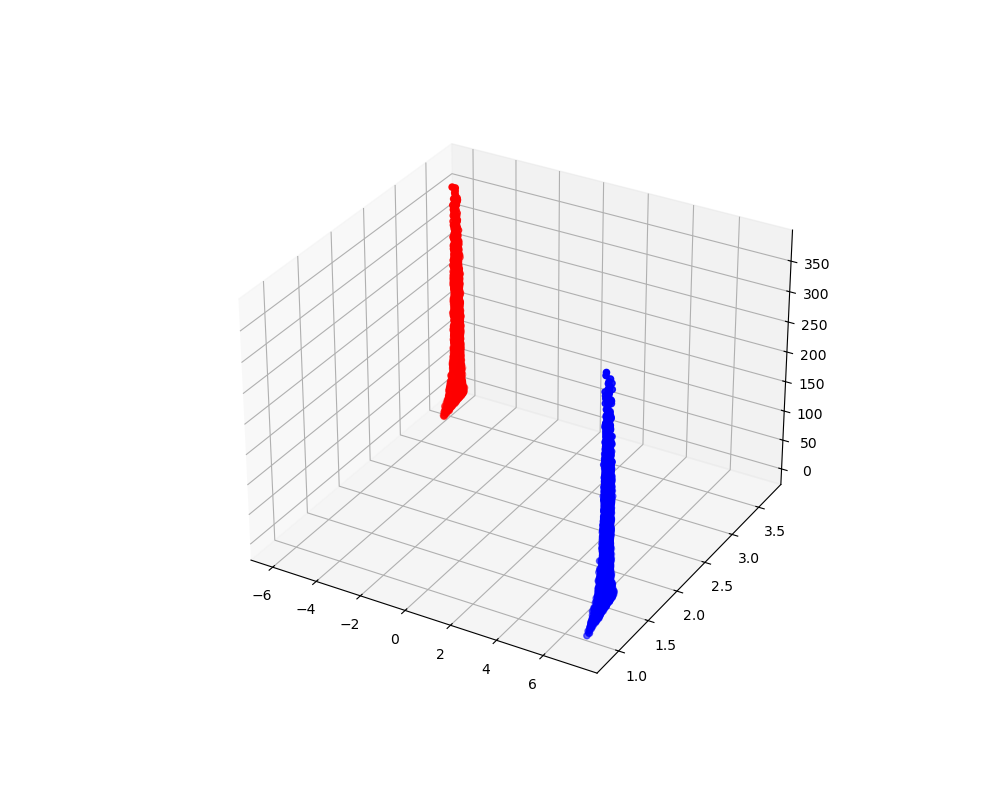

In [9]:
%matplotlib ipympl
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
n = len(modi+1)
color = plt.cm.rainbow(np.linspace(0, 1, n))
# for i, c in enumerate(color):
#     idx = np.argwhere(data['Modi'] == modi[i]).squeeze()
#     ax.scatter(score[idx, 0], score[idx, 1], data['Time'][idx], c=c)
unit = np.argwhere(data.values[:, 0] == 10).squeeze()
idx = np.argwhere(data.values[:, 2] == 1.0).squeeze()
ax.scatter(score[idx, 0], score[idx, 1], data['Time'][idx], color='r')
idx = np.argwhere(data.values[:, 2] == 2.0).squeeze()
ax.scatter(score[idx, 0], score[idx, 1], data['Time'][idx], color='b')
# idx = np.argwhere(data.values[:, 2] == 3.0).squeeze()
# ax.scatter(score[unit, 0], score[unit, 1], data['Time'][unit], color='g')

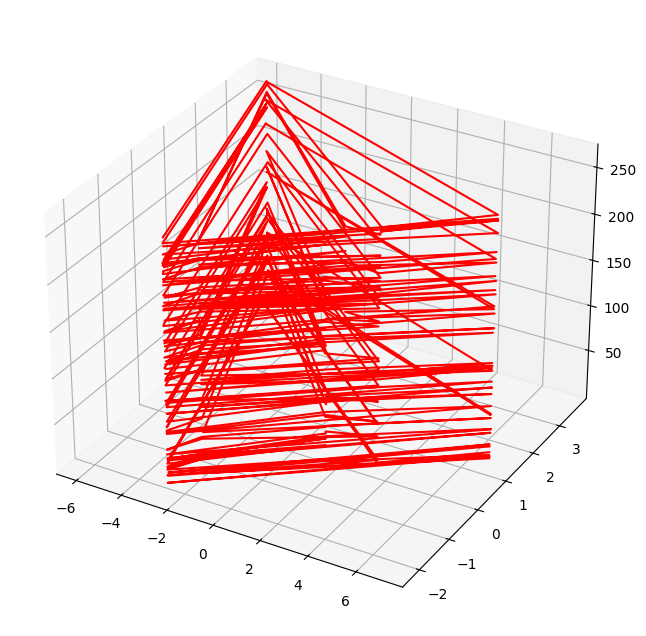

In [16]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(projection='3d')
uid = 2
idx = np.argwhere(data.values[:, 0] == uid).squeeze()
# ax.scatter(score[:, 0], score[:, 1], data['Time'])
ax.plot(score[idx, 0], score[idx, 1], data['Time'][idx], color='r')

Text(0.5, 0, 'PC 3')

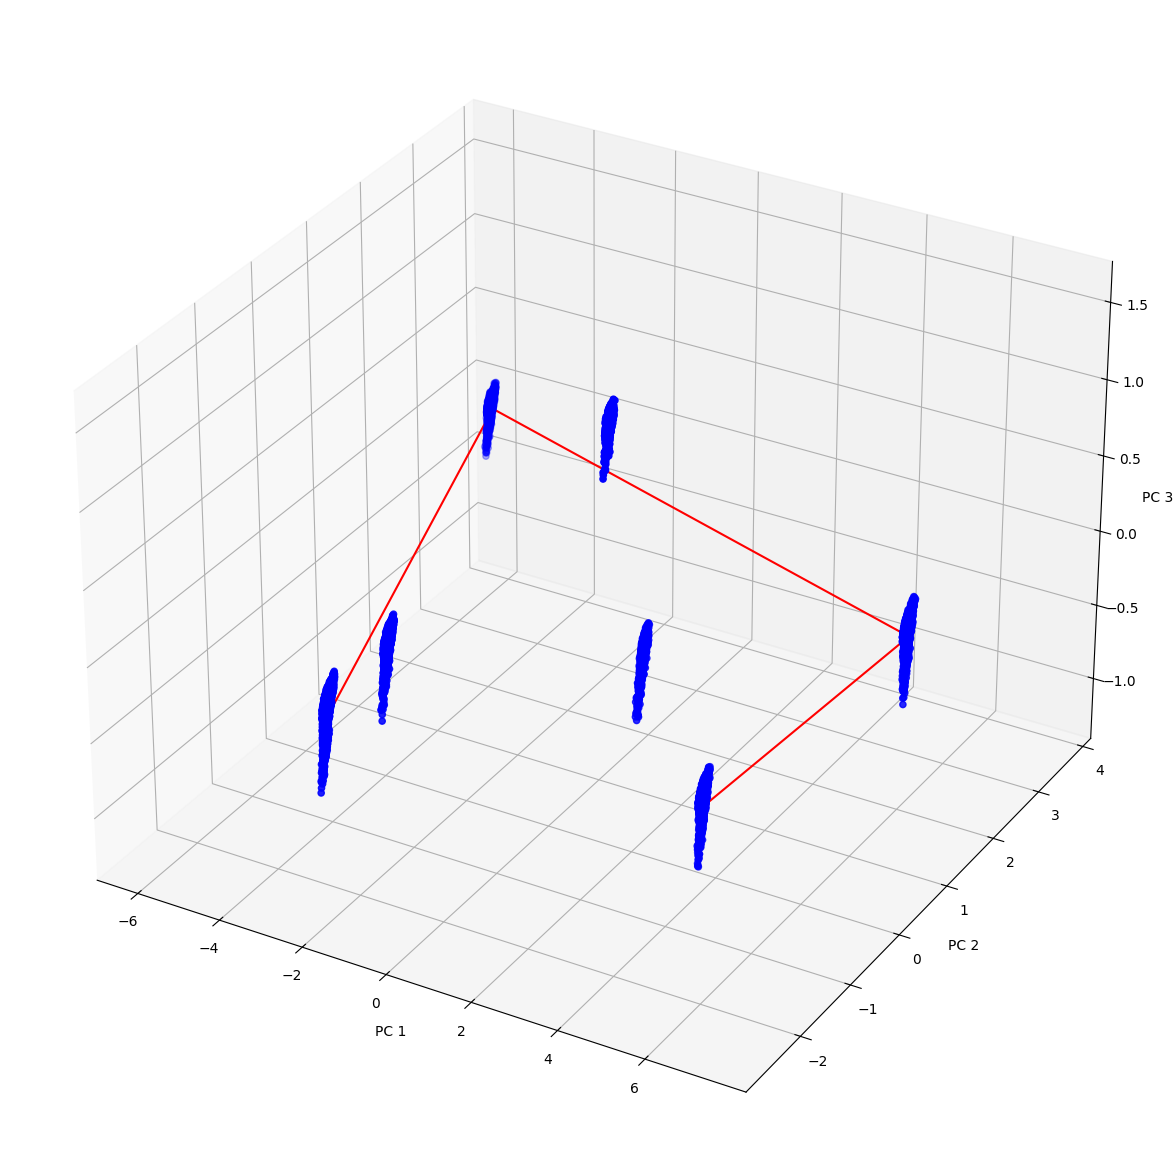

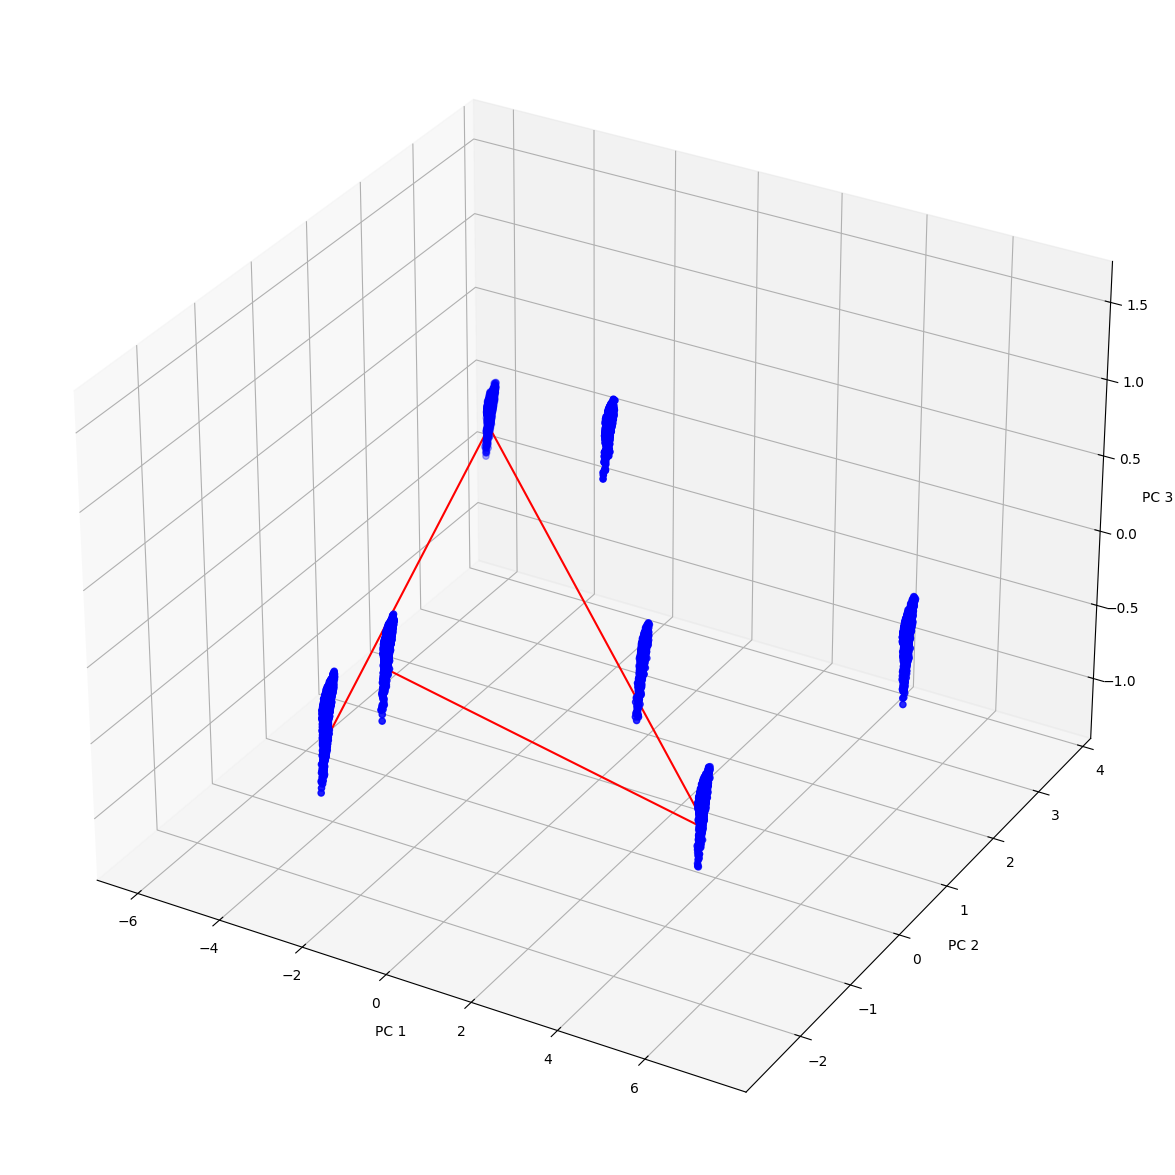

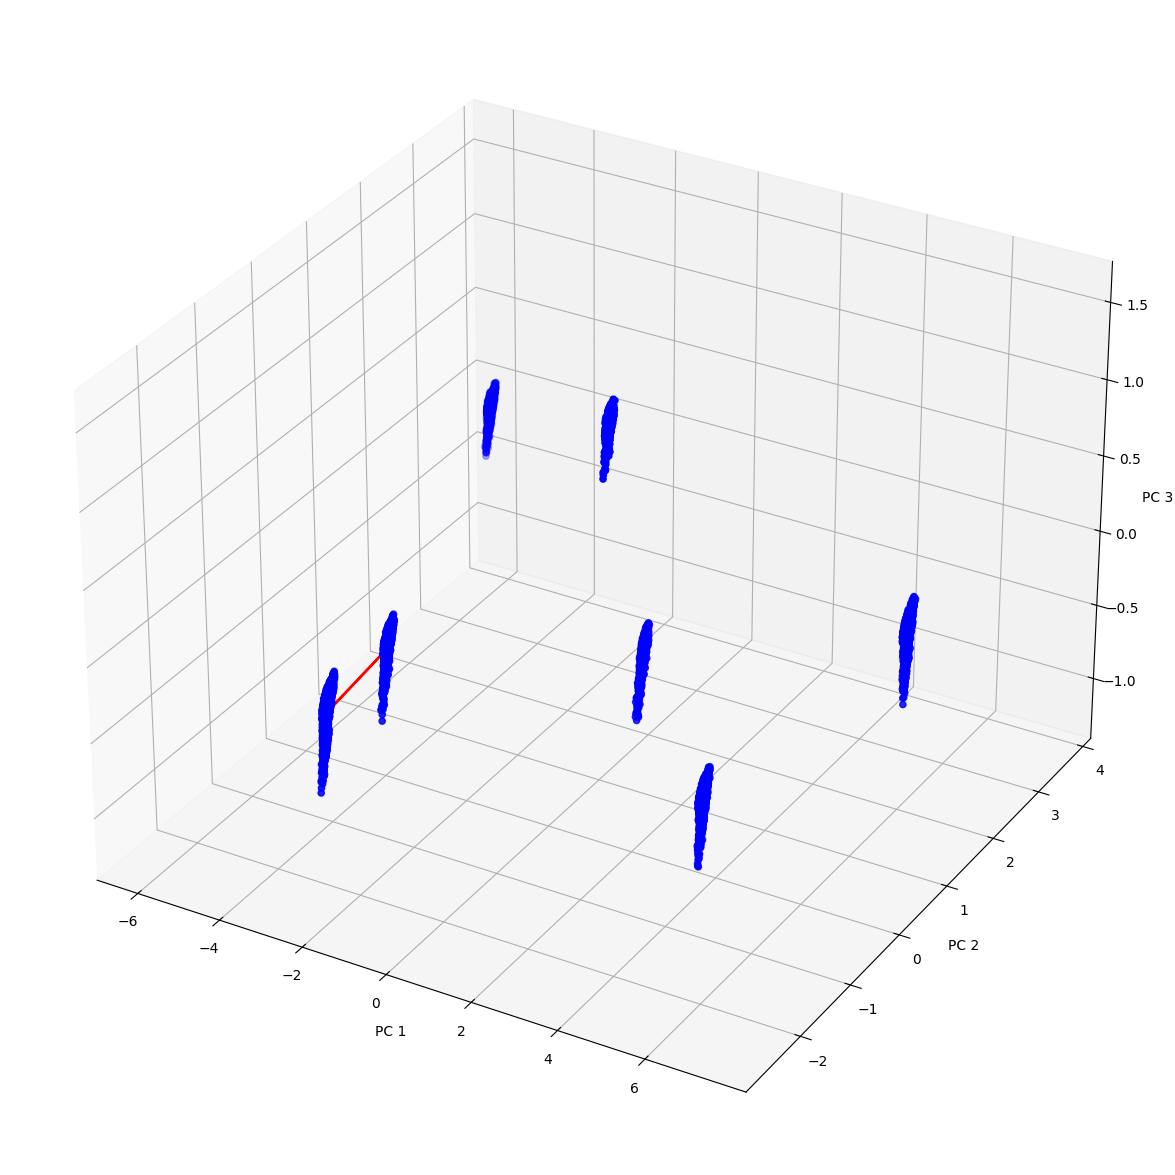

In [41]:
uid = 2
idx = np.argwhere(data.values[:, 0] == uid).squeeze()
idx = idx[len(idx)-5:]
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
ax.scatter(score[:, 0], score[:, 1], score[:, 2], color='blue')
ax.plot(score[idx, 0], score[idx, 1], score[idx, 2], color='red')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

uid = 5
idx = np.argwhere(data.values[:, 0] == uid).squeeze()
idx = idx[len(idx)-5:]
fig = plt.figure(figsize=(15, 15))
ax2 = fig.add_subplot(projection='3d')
ax2.scatter(score[:, 0], score[:, 1], score[:, 2], color='blue')
ax2.plot(score[idx, 0], score[idx, 1], score[idx, 2], color='red')
ax2.set_xlabel('PC 1')
ax2.set_ylabel('PC 2')
ax2.set_zlabel('PC 3')

uid = 100
idx = np.argwhere(data.values[:, 0] == uid).squeeze()
idx = idx[len(idx)-5:]
fig = plt.figure(figsize=(15, 15))
ax3 = fig.add_subplot(projection='3d')
ax3.scatter(score[:, 0], score[:, 1], score[:, 2], color='blue')
ax3.plot(score[idx, 0], score[idx, 1], score[idx, 2], color='red')
ax3.set_xlabel('PC 1')
ax3.set_ylabel('PC 2')
ax3.set_zlabel('PC 3')

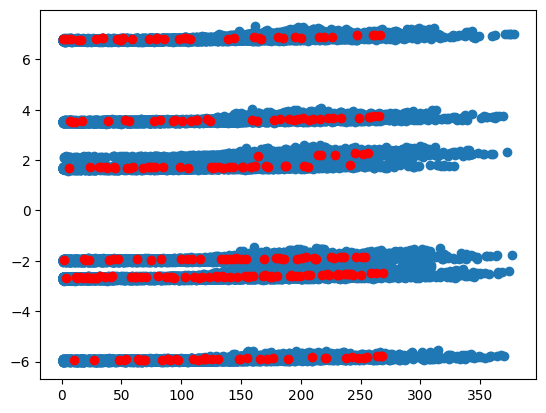

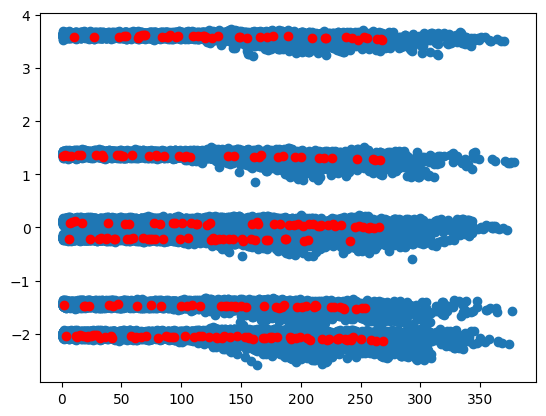

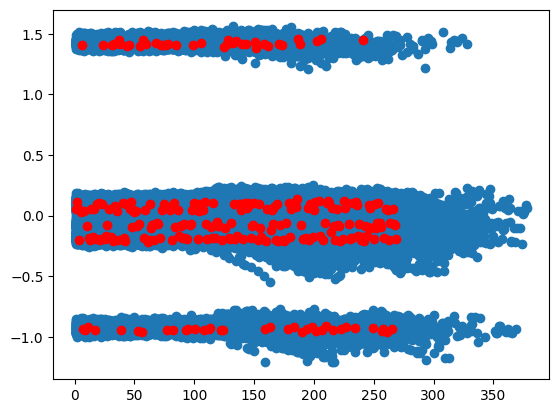

In [46]:
uid = 2
idx = np.argwhere(data.values[:, 0] == uid).squeeze()
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(data['Time'], score[:, 0])
ax.scatter(data['Time'][idx], score[idx, 0], c='red')

uid = 2
idx = np.argwhere(data.values[:, 0] == uid).squeeze()
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(data['Time'], score[:, 1])
ax.scatter(data['Time'][idx], score[idx, 1], c='red')

uid = 2
idx = np.argwhere(data.values[:, 0] == uid).squeeze()
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(data['Time'], score[:, 2])
ax.scatter(data['Time'][idx], score[idx, 2], c='red')

In [ ]:
modi = 48
modi = np.round((data.loc[:,'Setting1'] + data.loc[:,'Setting2'] + data.loc[:,'Setting3']) /3)
print(f'Unique modes: {modi.unique()}')
idx = np.argwhere(data.values[:, 

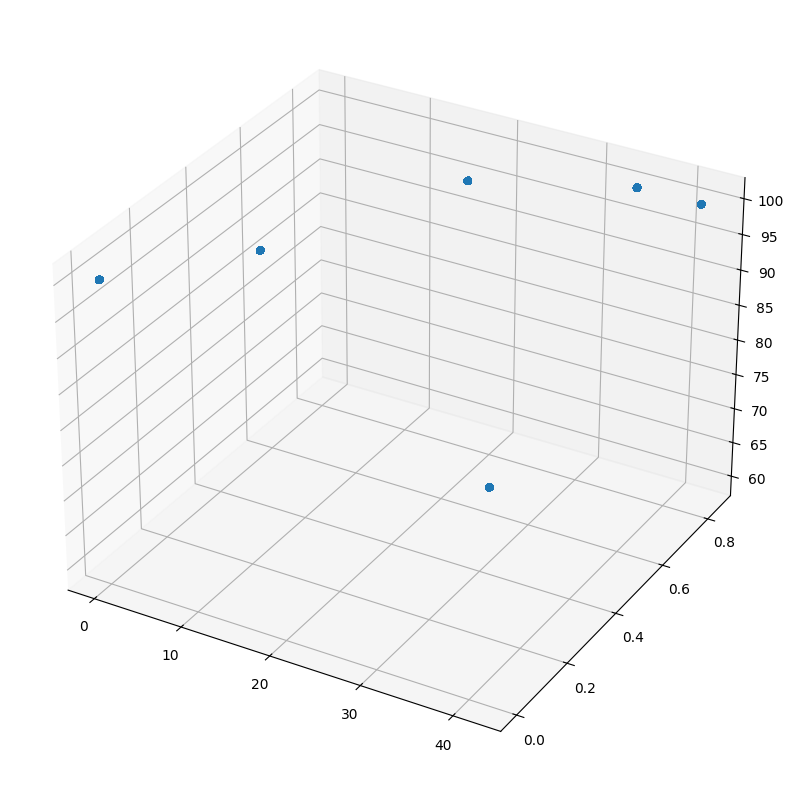

In [4]:
# Settings
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
#data.plot.scatter(x='Time', y='Setting1')
#data.plot.scatter(x='Time', y='Setting2')
ax.scatter(data['Setting1'], data['Setting2'], data['Setting3'])

<Figure size 640x480 with 0 Axes>

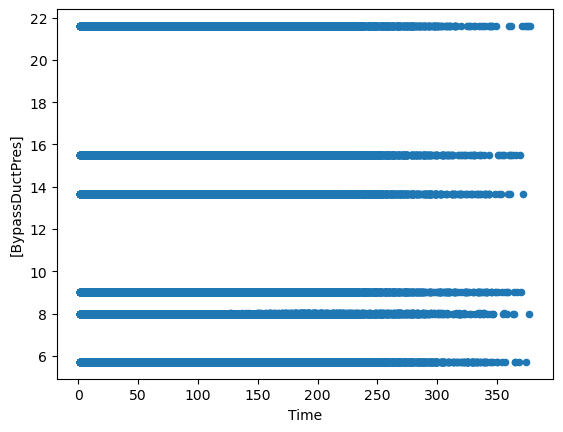

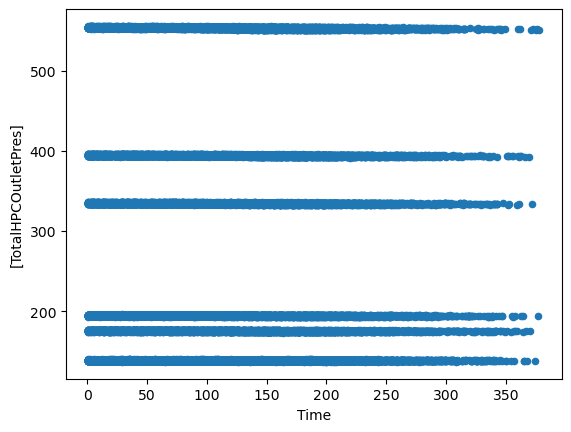

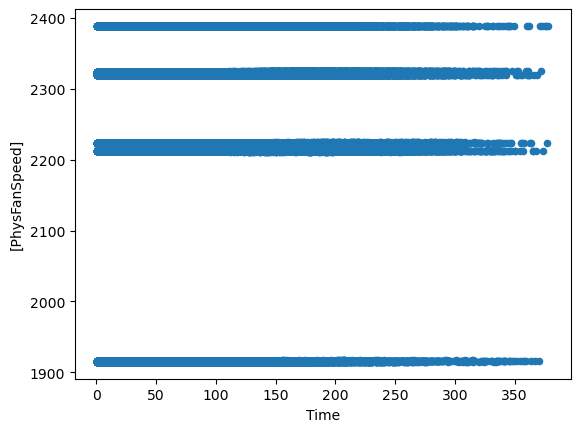

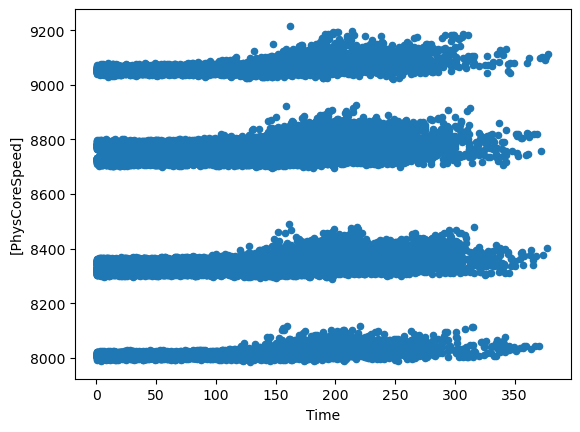

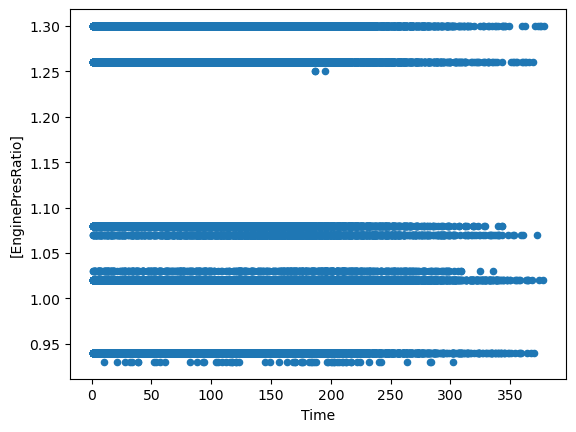

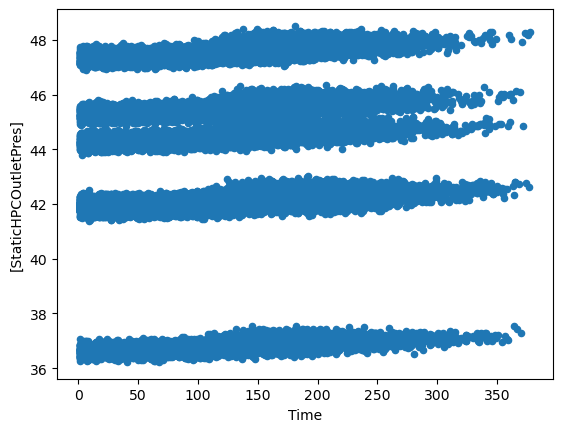

In [66]:
bypass_duct_pres = data[['Unit', 'Time', 'BypassDuctPres']].values
# bypass_duct_pres_unit = data[data['Unit'] == 5]['BypassDuctPres']
# bypass_duct_pres_unit.plot(style='.')
# fig, axes = plt.subplots(3, 3)
fig = plt.figure()
for i in range(6):
    data.plot(x='Time', y=[data.columns[i+10]], kind="scatter")
# data.plot.scatter(x='Time', y='BypassDuctPres')

KeyError: 'Column not found: slice(1, 2, None)'

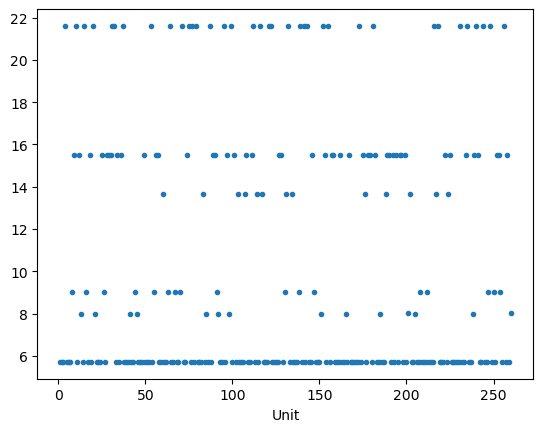

In [73]:
last_pressure_per_unit = data.groupby('Unit')['BypassDuctPres'].last()
last_pressure_per_unit.plot(style='.')
units = data.groupby('Unit')

In [30]:
fig = plt.figure()
plt.scatter(last_pressure_per_unit[['Unit']])

KeyError: "None of [Index(['Unit'], dtype='object', name='Unit')] are in the [index]"

<Figure size 640x480 with 0 Axes>